<a href="https://colab.research.google.com/github/NicoPP1/PDI/blob/main/TP4/TP4Parma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico Nº4 Procesamiento Digital de Imágenes
### Autor: Nicolás Daniel Parma Paternostro
### Consigna: 
* Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.

* Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.

* Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.


### Fecha de entrega: 08 de Octubre

### Librerias


In [1]:
#Librerias
import imageio
import numpy as np
import matplotlib.pyplot as plt

### Carga de imagen para obtener su histograma posteriormente

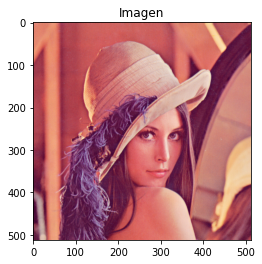

In [2]:
#@title Ingrese URL de la imagen deseada { run: "auto", vertical-output: true }
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png" #@param {type:"string"}
img = imageio.imread(url)

plt.figure()
plt.title("Imagen")
plt.imshow(img)

### Funciones necesarias para obtener los componentes YIQ y RGB de una imagen

In [3]:
#Función para clipear la luminancia
def clipY(mat):
    mat = np.clip(mat,0.0,1.0)
    return mat

#Función para clipear la componente en fase
def clipI(mat):
    mat = np.clip(mat,-0.5957,0.5957)          
    return mat

#Función para clipear la el componente en cuadratura
def clipQ(mat):
    mat = np.clip(mat,-0.5226,0.5226)          
    return mat

#Función para obtener componentes RGB de una imagen y devolverlo en el espacio YIQ
def RGB2YIQ(img):
    img = img.astype(float) #Cambio tipo de dato para trabajar en float
    r,g,b = RGB(img)
    r = r/255 #normalizo canales
    g = g/255 #normalizo canales
    b = b/255 #normalizo canales

    Y = (r*0.299+g*0.587+b*0.114)
    I = (r*0.595716-g*0.274453-b*0.321263)
    Q = (r*0.211456-g*0.522591+b*0.311135)

    return(Y,I,Q)

#Función para obtener los canales RGB de una imagen
def RGB(img):
    img = img.astype(float) #Cambio tipo de dato para trabajar en float
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    return r,g,b

#Función para obtener una imagen RGB a partir de los componentes YIQ modificadas
def YIQ2RGB(Y,I,Q):
    Y = clipY(Y) #función para clipear luminancia
    I = clipI(I) #función para clipear luminancia
    Q = clipQ(Q) #función para clipear luminancia

    dimension = Y.shape

    r = np.zeros((dimension[0],dimension[1]), dtype = float)
    g = np.zeros((dimension[0],dimension[1]), dtype = float)
    b = np.zeros((dimension[0],dimension[1]), dtype = float)

    r = (Y+0.9563*I+0.621*Q)*255
    g = (Y-0.2721*I-0.6474*Q)*255
    b = (Y-1.1070*I+1.7046*Q)*255

    r = np.clip(r,0,255)
    g = np.clip(g,0,255)
    b = np.clip(b,0,255)

    img = np.zeros((dimension[0],dimension[1],3),dtype = 'uint8') #Transformo a tipo de dato uint8 ya que es el requerido para mostrar las imágenes
    img[:,:,0] = r
    img[:,:,1] = g
    img[:,:,2] = b

    return(img)

### Implementación de la función para obtener el histograma y un vector rango a partir de la luminancia de una imagen y la cantidad de contadores deseados

In [4]:
def getHistogram(Y,contadores):
    hist = np.zeros(contadores)
    bins = np.linspace(0,1,num = contadores)
    dimension = Y.shape
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            for k in range(hist.size):
                if Y[i,j] <= (k+1)/contadores:
                    hist[k] += 1
                    break;
    return hist, bins

### Obtengo el histograma de la imagen según la cantidad de contadores que desea el usuario

En la segunda imagen se encuentran superpuestos ambos histogramas para ver las diferencias


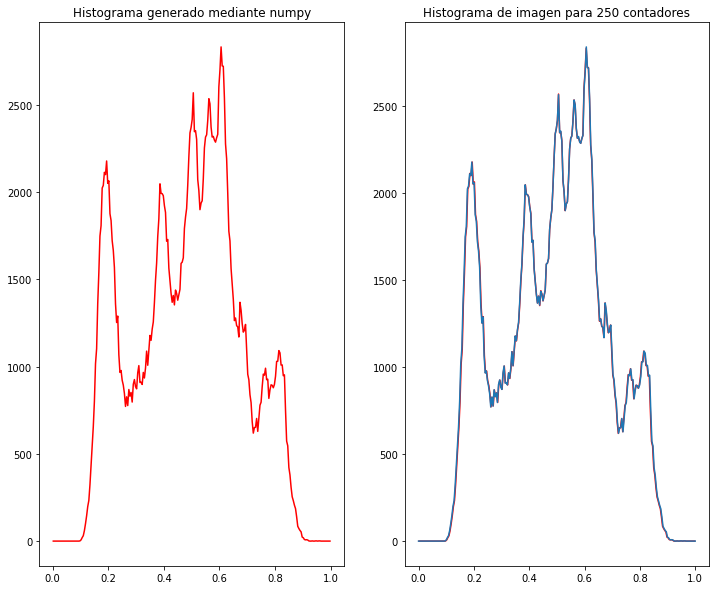

In [5]:
#@title Ingrese la cantidad de contadores deseados { run: "auto", vertical-output: true }

Y,I,Q = RGB2YIQ(img)
contadores =  250#@param {type:"integer"}

hist,bins = getHistogram(Y,contadores)

fig0, ax0 = plt.subplots(1,2)
fig0.set_size_inches(12, 10)
hist2, borders = np.histogram(Y.ravel(), 250,[0,1])

print("En la segunda imagen se encuentran superpuestos ambos histogramas para ver las diferencias")
ax0[0].set_title("Histograma generado mediante numpy")
ax0[0].plot((borders[1:] + borders[:-1])/2, hist2, color = 'red')
ax0[1].plot((borders[1:] + borders[:-1])/2, hist2, color = 'red')

ax0[1].set_title(f"Histograma de imagen para {contadores} contadores")
ax0[1].plot(bins,hist)

### Muestro el histograma de la imagen para 5 valores distintos de contadores

Text(0.5, 1.0, 'Histograma para 1000 contadores')

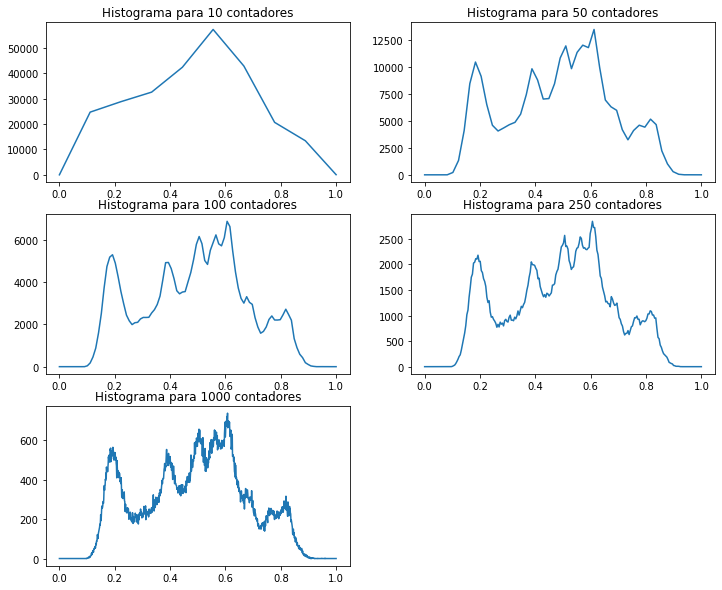

In [6]:
#Creo subplot para mostrar las imágenes a la par
fig1, ax1 = plt.subplots(3,2)
fig1.set_size_inches(12, 10)
fig1.delaxes(ax1[2,1])

hist10, bins10 = getHistogram(Y,10)
hist50, bins50 = getHistogram(Y,50)
hist100, bins100 = getHistogram(Y,100)
hist250, bins250 = getHistogram(Y,250)
hist1000, bins1000 = getHistogram(Y,1000)

ax1[0,0].plot(bins10,hist10)
ax1[0,0].set_title("Histograma para 10 contadores")

ax1[0,1].plot(bins50,hist50)
ax1[0,1].set_title("Histograma para 50 contadores")

ax1[1,0].plot(bins100,hist100)
ax1[1,0].set_title("Histograma para 100 contadores")

ax1[1,1].plot(bins250,hist250)
ax1[1,1].set_title("Histograma para 250 contadores")

ax1[2,0].plot(bins1000,hist1000)
ax1[2,0].set_title("Histograma para 1000 contadores")



### Análisis resultados
 Se pudo desarrollar una función que a partir de la luminancia de una imagen y una cierta cantidad de contadores, obtener el histograma de la imagen y un vector rango correspondiente. Cabe mencionar que la función que realiza el histograma es poco óptima, ya que realiza el histograma elemento a elemento. En caso de ser necesario una función más optima se debería haber implementado una función matricial con alguna función de numpy como lo podría ser np.where, sin embargo no se implemento dicha mejora y se trabajo elemento a elemento ya que la función implementada funciona correctamente y no era condición excluyente la optimización del mismo. 
 
 Al probar la función desarrollada, gracias a la "standarización" de la imagen de lenna, se pudo encontrar el histograma de la misma en la web, lo cual fue de ayuda al momento de evaluar si los resultados eran correctos. A continuación se adjunta la imagen encontrada en la web con su respectivo histograma.

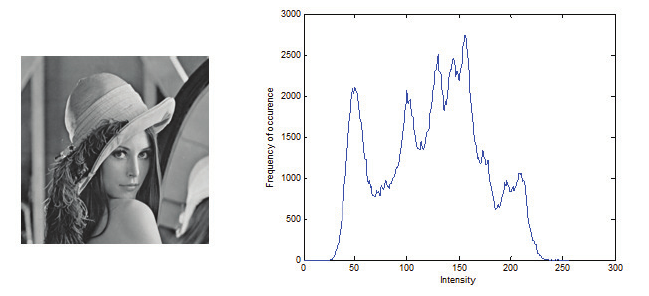

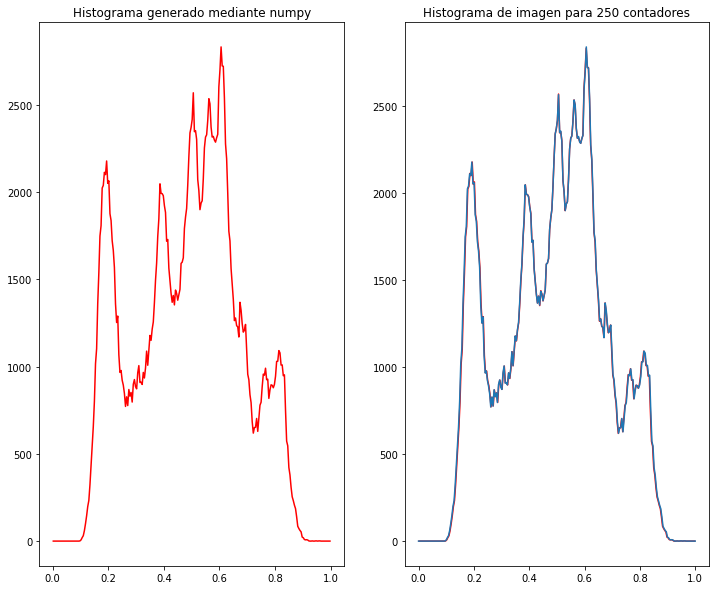


 Luego, con respecto a los histogramas para distintos contadores, se observa que a medida que se aumenta la cantidad del mismo el histograma se encuentra más definido, sin embargo, si el número es muy alto se comienza a observar cierto ruido en el histograma obtenido (observar el caso para 1000 contadores). Lo cual tiene sentido, ya que para esta magnitud de valores se está discriminando una diferencia de luminancia de 0.1% lo cual es exagerado.

 Además, se utilizó la función np.histogram para comparar el histograma implementado. Como se puede observar en la imagen generada por el código, ambos histogramas se encuentran superpuestos sin diferencias practicamente por lo que se concluye que la implementación de una función que realice el histograma se realizó exitosamente.


## Segunda parte

### A partir de dos imágenes con problemas de iluminación, se buscará corregir la iluminación mediante la multiplicación de la componente de luminancia Y por un escalar. Los análisis de los resultados se hará al final, para poder comparar los resultados obtenidos en esta sección contra los obtenidos en la tercera sección del trabajo práctico.

### Ingreso imágenes con problemas de iluminación

Text(0.5, 1.0, 'Imagen sobreexpuesta')

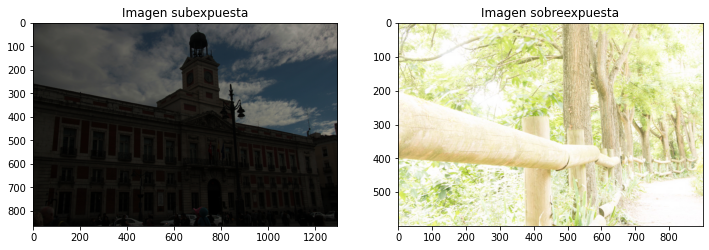

In [7]:
#@title Ingrese URL de la imagen deseada { run: "auto", vertical-output: true }
urlA = "https://laselvadeanaconda.files.wordpress.com/2018/12/p5_e1_sol.jpg?w=1400" #@param {type:"string"}
imgA = imageio.imread(urlA)

#@title Ingrese URL de la imagen deseada { run: "auto", vertical-output: true }
urlB = "http://www.canonistas.com/galerias/data/500/669_ok.JPG" #@param {type:"string"}
imgB = imageio.imread(urlB)

fig2, ax2 = plt.subplots(1,2)
fig2.set_size_inches(12, 10)

ax2[0].imshow(imgA)
ax2[0].set_title("Imagen subexpuesta")

ax2[1].imshow(imgB)
ax2[1].set_title("Imagen sobreexpuesta")




### Multiplico a la componente de luminancia Y de la primer imagen por un escalar (mayor a uno ya que dicha imagen se encuentra subexpuesta, por lo que debo aumentar la ganancia de la componente Y)

Text(0.5, 1.0, 'Histograma imagen con luminancia multiplicada por un escalar')

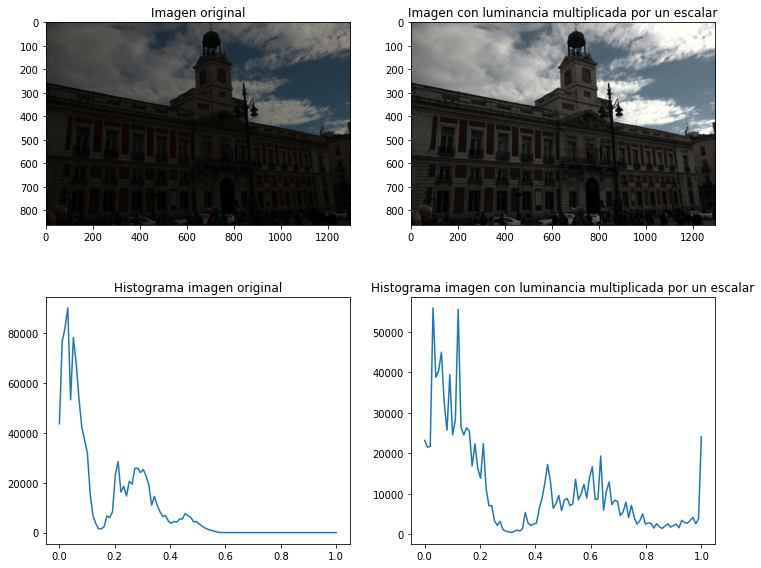

In [8]:
#@title  { run: "auto", vertical-output: true }
alpha = 2.1 #@param {type:"slider", min:0, max:5, step:0.1}
YA, IA, QA = RGB2YIQ(imgA)
imgAmod = YIQ2RGB(alpha*YA,IA,QA)

YAmod, IAmod, QAmod = RGB2YIQ(imgAmod)

fig2, ax2 = plt.subplots(2,2)
fig2.set_size_inches(12, 10)

ax2[0,0].imshow(imgA)
ax2[0,0].set_title("Imagen original")

ax2[0,1].imshow(imgAmod)
ax2[0,1].set_title("Imagen con luminancia multiplicada por un escalar")

histYA, binsYA = getHistogram(YA,100)
ax2[1,0].plot(binsYA,histYA)
ax2[1,0].set_title("Histograma imagen original")

histYAmod, binsYAmod = getHistogram(YAmod,100)
ax2[1,1].plot(binsYAmod,histYAmod)
ax2[1,1].set_title("Histograma imagen con luminancia multiplicada por un escalar")



### Multiplico a la componente de luminancia Y de la segunda imagen por un escalar (menor a uno ya que dicha imagen se encuentra sobreexpuesta, por lo que debo disminuir la ganancia de la componente Y)

Text(0.5, 1.0, 'Histograma imagen con luminancia multiplicada por un escalar')

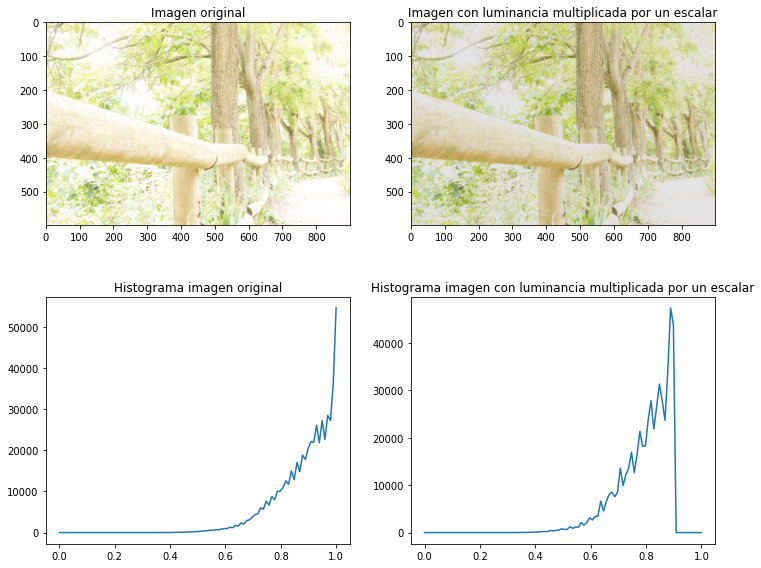

In [12]:
#@title  { run: "auto", vertical-output: true }
alpha = 0.9 #@param {type:"slider", min:0, max:5, step:0.1}
YB, IB, QB = RGB2YIQ(imgB)

imgBmod = YIQ2RGB(alpha*YB,IB,QB)

YBmod, IBmod, QBmod = RGB2YIQ(imgBmod)

fig3, ax3 = plt.subplots(2,2)
fig3.set_size_inches(12, 10)

ax3[0,0].imshow(imgB)
ax3[0,0].set_title("Imagen original")

ax3[0,1].imshow(imgBmod)
ax3[0,1].set_title("Imagen con luminancia multiplicada por un escalar")

histYB, binsYB = getHistogram(YB,100)
ax3[1,0].plot(binsYB,histYB)
ax3[1,0].set_title("Histograma imagen original")

histYBmod, binsYBmod = getHistogram(YBmod,100)
ax3[1,1].plot(binsYBmod,histYBmod)
ax3[1,1].set_title("Histograma imagen con luminancia multiplicada por un escalar")



## Tercera parte
### Implementación de funciones lineal a trozos, raíz cuadrada y potencia cuadrática


In [14]:
def linealATrozos(Y,Y_min,Y_max):
    dim = Y.shape
    YC = np.zeros((dim[0],dim[1]), dtype = float)

    for i in range(dim[0]):
        for j in range(dim[1]):
            if (Y[i,j] < Y_min):
                YC[i,j] = 0
            elif (Y[i,j] > Y_max):
                YC[i,j] = 1
            else:
                YC[i,j] = Y[i,j]/(Y_max-Y_min) - Y_min/(Y_max-Y_min) #y = ax+b 
    YC = np.clip(YC,0,1)                
    return YC

def raizCuadrada(Y):
    dim = Y.shape
    YC = np.zeros((dim[0],dim[1]), dtype = float)

    YC = np.sqrt(Y,dtype = float)

    YC = np.clip(YC,0,1)   
    return YC

def potenciaCuadratica(Y):
    dim = Y.shape
    YC = np.zeros((dim[0],dim[1]), dtype = float)

    YC = Y**2

    YC = np.clip(YC,0,1)    
    return YC

## Aplico las distintas funciones a la primer imagen

Text(0.5, 1.0, 'Histograma imagen filtro lineal a trozos')

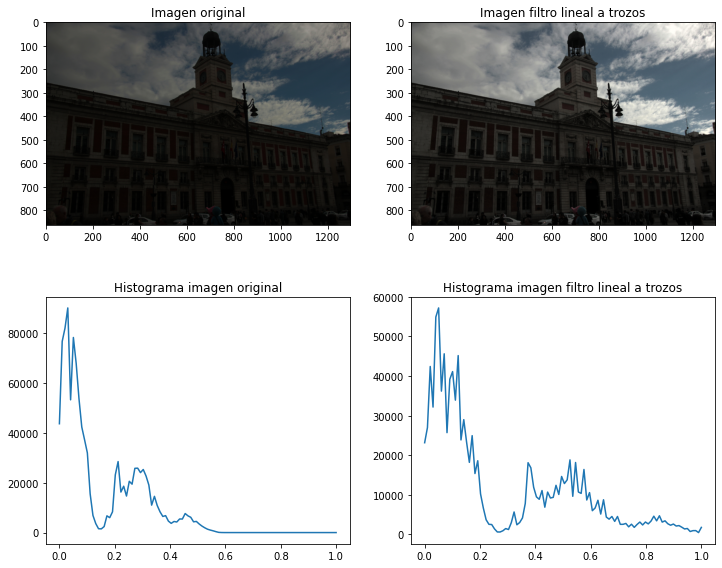

In [15]:
#@title  { run: "auto", vertical-output: true }
Y_min = 0 #@param {type:"slider", min:0, max:1, step:0.05}
Y_max = 0.55 #@param {type:"slider", min:0, max:1, step:0.05}

YAmodlin = linealATrozos(YA,Y_min,Y_max)
imgAmodlin = YIQ2RGB(YAmodlin,IA,QA)

fig4, ax4 = plt.subplots(2,2)
fig4.set_size_inches(12, 10)

ax4[0,0].imshow(imgA)
ax4[0,0].set_title("Imagen original")

ax4[0,1].imshow(imgAmodlin)
ax4[0,1].set_title("Imagen filtro lineal a trozos")

ax4[1,0].plot(binsYA,histYA)
ax4[1,0].set_title("Histograma imagen original")

histYAlin, binsYAlin = getHistogram(YAmodlin,100)
ax4[1,1].plot(binsYAlin,histYAlin)
ax4[1,1].set_title("Histograma imagen filtro lineal a trozos")

Text(0.5, 1.0, 'Histograma imagen filtro raiz cuadrada')

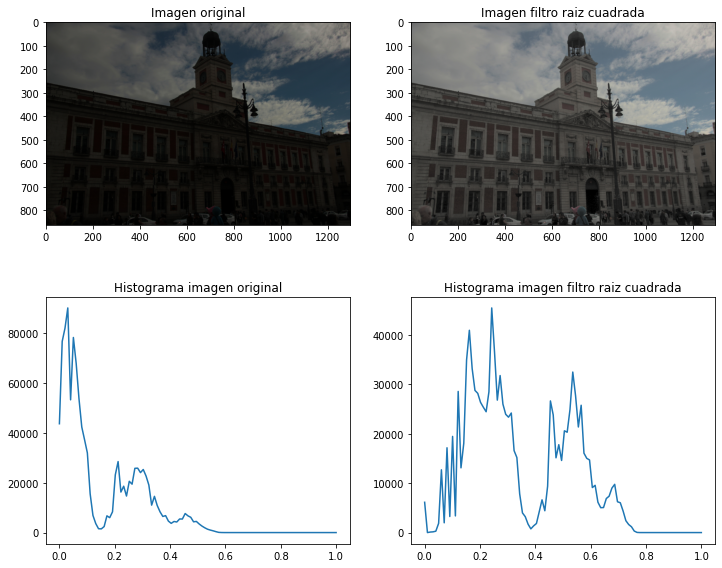

In [16]:
YAmodsqrt = raizCuadrada(YA)

imgAmodsqrt = YIQ2RGB(YAmodsqrt,IA,QA)

fig5, ax5 = plt.subplots(2,2)
fig5.set_size_inches(12, 10)

ax5[0,0].imshow(imgA)
ax5[0,0].set_title("Imagen original")

ax5[0,1].imshow(imgAmodsqrt)
ax5[0,1].set_title("Imagen filtro raiz cuadrada")

ax5[1,0].plot(binsYA,histYA)
ax5[1,0].set_title("Histograma imagen original")

histYAsqrt, binsYAsqrt = getHistogram(YAmodsqrt,100)
ax5[1,1].plot(binsYAsqrt,histYAsqrt)
ax5[1,1].set_title("Histograma imagen filtro raiz cuadrada")


Text(0.5, 1.0, 'Histograma imagen filtro potencia cuadrada')

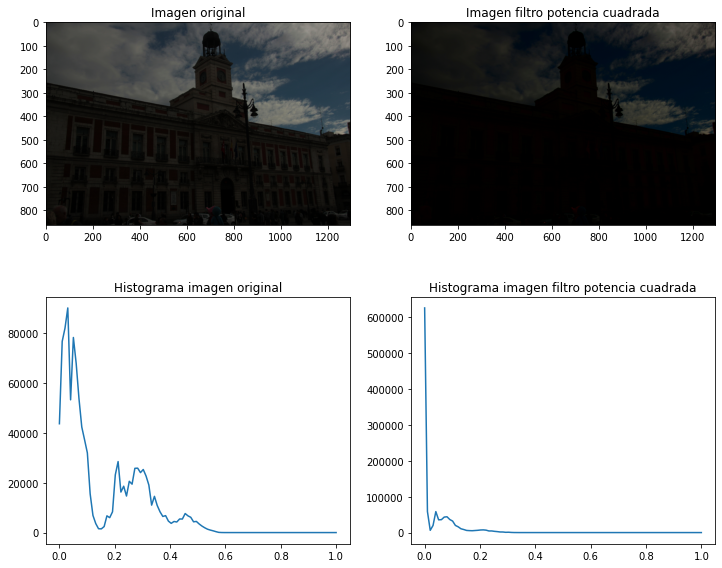

In [17]:
YAmodcuad = potenciaCuadratica(YA)

imgAmodcuad = YIQ2RGB(YAmodcuad,IA,QA)

fig6, ax6 = plt.subplots(2,2)
fig6.set_size_inches(12, 10)

ax6[0,0].imshow(imgA)
ax6[0,0].set_title("Imagen original")

ax6[0,1].imshow(imgAmodcuad)
ax6[0,1].set_title("Imagen filtro potencia cuadrada")

ax6[1,0].plot(binsYA,histYA)
ax6[1,0].set_title("Histograma imagen original")

histYAcuad, binsYAcuad = getHistogram(YAmodcuad,100)
ax6[1,1].plot(binsYAcuad,histYAcuad)
ax6[1,1].set_title("Histograma imagen filtro potencia cuadrada")


## Aplico las distintas funciones a la segunda imagen

Text(0.5, 1.0, 'Histograma imagen filtro lineal a trozos')

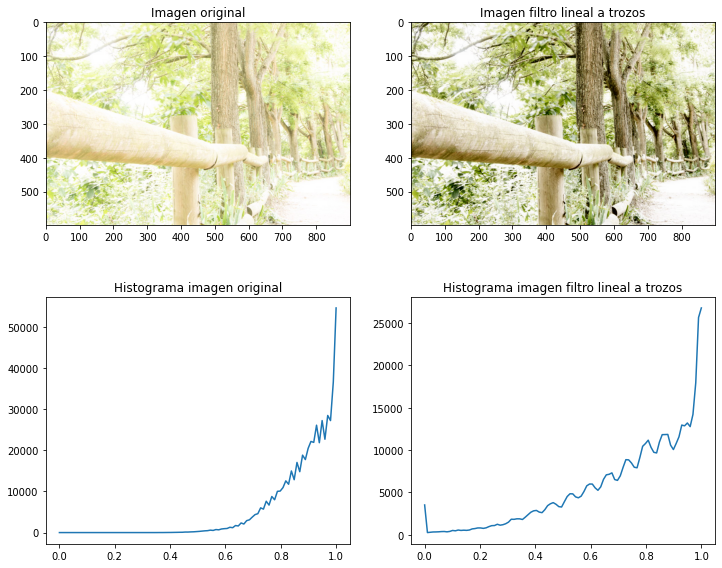

In [18]:
#@title  { run: "auto", vertical-output: true }
Y_min = 0.55 #@param {type:"slider", min:0, max:1, step:0.05}
Y_max = 1 #@param {type:"slider", min:0, max:1, step:0.05}

YBmodlin = linealATrozos(YB,Y_min,Y_max)
imgBmodlin = YIQ2RGB(YBmodlin,IB,QB)

fig7, ax7 = plt.subplots(2,2)
fig7.set_size_inches(12, 10)

ax7[0,0].imshow(imgB)
ax7[0,0].set_title("Imagen original")

ax7[0,1].imshow(imgBmodlin)
ax7[0,1].set_title("Imagen filtro lineal a trozos")

ax7[1,0].plot(binsYB,histYB)
ax7[1,0].set_title("Histograma imagen original")

histYBlin, binsYBlin = getHistogram(YBmodlin,100)
ax7[1,1].plot(binsYBlin,histYBlin)
ax7[1,1].set_title("Histograma imagen filtro lineal a trozos")

Text(0.5, 1.0, 'Histograma imagen filtro raiz cuadrada')

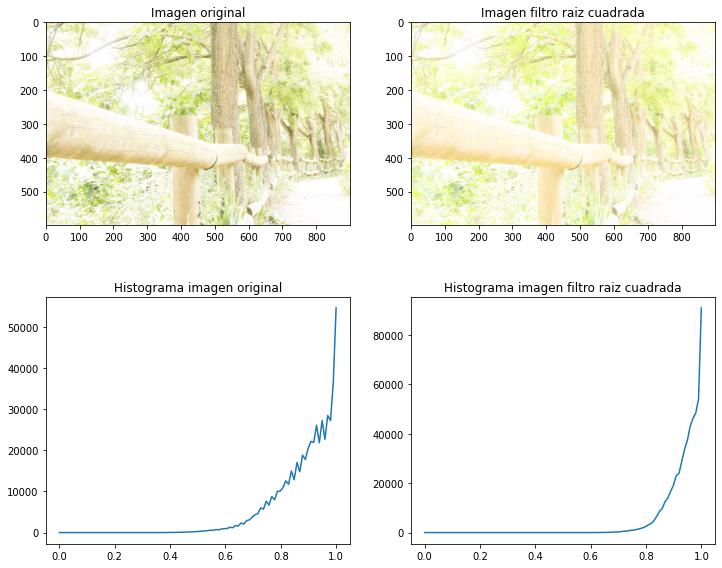

In [19]:
YBmodsqrt = raizCuadrada(YB)
imgBmodsqrt = YIQ2RGB(YBmodsqrt,IB,QB)

fig8, ax8 = plt.subplots(2,2)
fig8.set_size_inches(12, 10)

ax8[0,0].imshow(imgB)
ax8[0,0].set_title("Imagen original")

ax8[0,1].imshow(imgBmodsqrt)
ax8[0,1].set_title("Imagen filtro raiz cuadrada")

ax8[1,0].plot(binsYB,histYB)
ax8[1,0].set_title("Histograma imagen original")

histYBsqrt, binsYBsqrt = getHistogram(YBmodsqrt,100)
ax8[1,1].plot(binsYBsqrt,histYBsqrt)
ax8[1,1].set_title("Histograma imagen filtro raiz cuadrada")

Text(0.5, 1.0, 'Histograma imagen filtro potencia cuadrática')

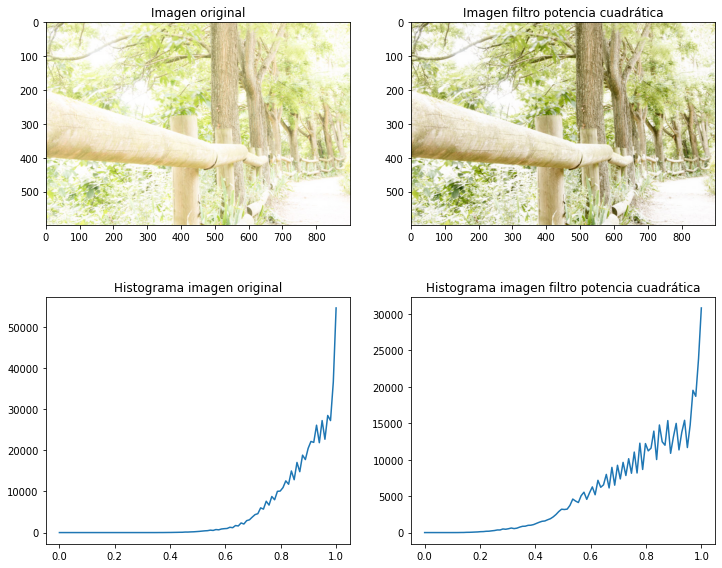

In [20]:
YBmodcuad = potenciaCuadratica(YB)
imgBmodcuad = YIQ2RGB(YBmodcuad,IB,QB)

fig9, ax9 = plt.subplots(2,2)
fig9.set_size_inches(12, 10)

ax9[0,0].imshow(imgB)
ax9[0,0].set_title("Imagen original")

ax9[0,1].imshow(imgBmodcuad)
ax9[0,1].set_title("Imagen filtro potencia cuadrática")

ax9[1,0].plot(binsYB,histYB)
ax9[1,0].set_title("Histograma imagen original")

histYBcuad, binsYBcuad = getHistogram(YBmodcuad,100)
ax9[1,1].plot(binsYBcuad,histYBcuad)
ax9[1,1].set_title("Histograma imagen filtro potencia cuadrática")

# Análisis de resultados
### Primer imagen
A continuación se mostrarán las imágenes obtenidas y sus respectivos histogramas




Text(0.5, 1.0, 'Histograma imagen potencia cuadrática')

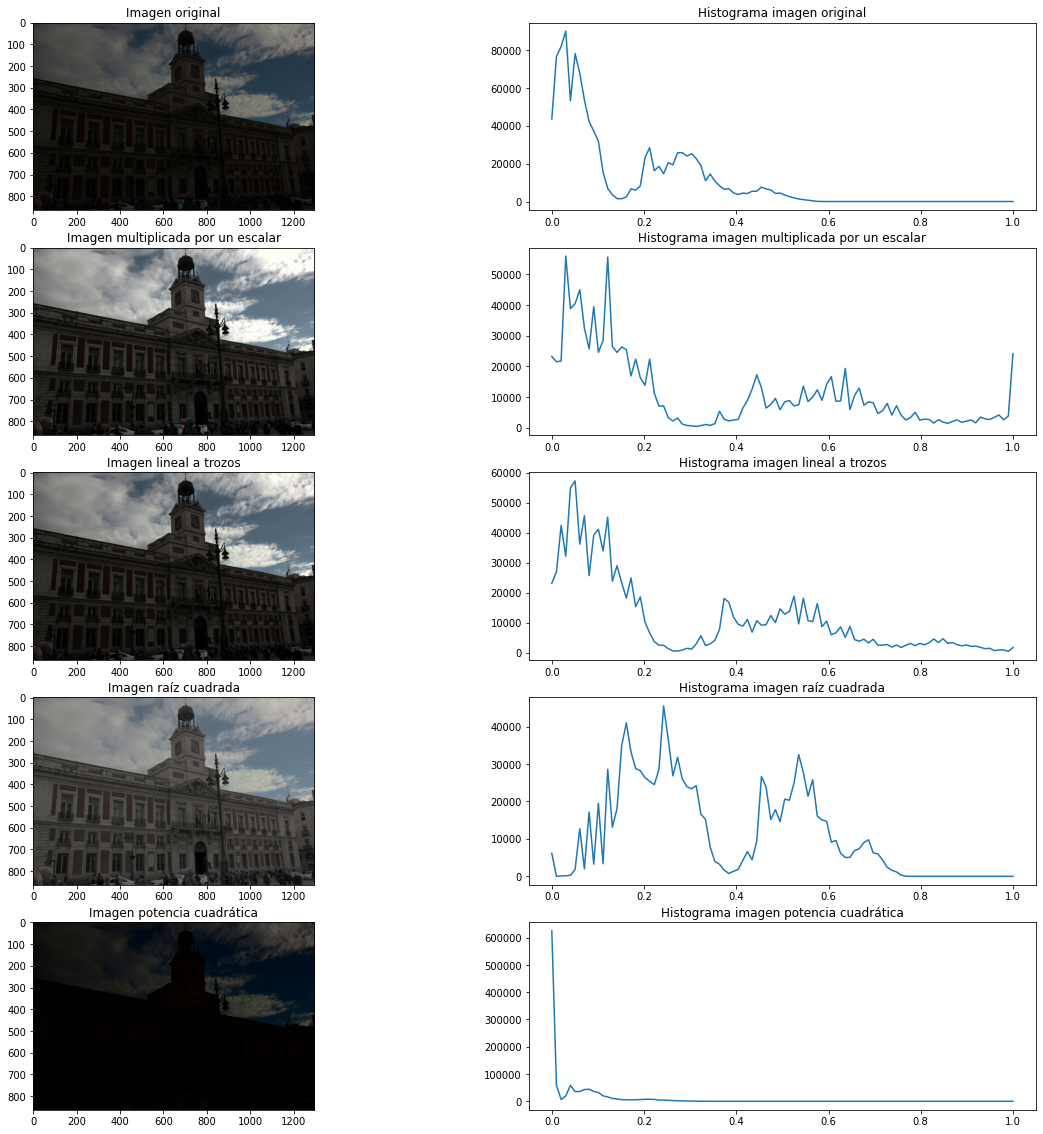

In [21]:
fig10, ax10 = plt.subplots(5,2)
fig10.set_size_inches(20, 20)

ax10[0,0].imshow(imgA)
ax10[0,0].set_title("Imagen original")
ax10[0,1].plot(binsYA, histYA)
ax10[0,1].set_title("Histograma imagen original")

ax10[1,0].imshow(imgAmod)
ax10[1,0].set_title("Imagen multiplicada por un escalar")
ax10[1,1].plot(binsYAmod, histYAmod)
ax10[1,1].set_title("Histograma imagen multiplicada por un escalar")

ax10[2,0].imshow(imgAmodlin)
ax10[2,0].set_title("Imagen lineal a trozos")
ax10[2,1].plot(binsYAlin, histYAlin)
ax10[2,1].set_title("Histograma imagen lineal a trozos")

ax10[3,0].imshow(imgAmodsqrt)
ax10[3,0].set_title("Imagen raíz cuadrada")
ax10[3,1].plot(binsYAsqrt, histYAsqrt)
ax10[3,1].set_title("Histograma imagen raíz cuadrada")

ax10[4,0].imshow(imgAmodcuad)
ax10[4,0].set_title("Imagen potencia cuadrática")
ax10[4,1].plot(binsYAcuad, histYAcuad)
ax10[4,1].set_title("Histograma imagen potencia cuadrática")


La primer imagen se encontraba subexpuesta. Debido a la forma del histograma, mediante la multiplicación de un escalar se logra obtener un resultado bueno, sin embargo este método no funciona para todas las imágenes ni para todos los casos de exposición. En cuanto a la función lineal a trozos, haciendo que el límite inferior de luminancia de entrada se mantenga en cero, y variando el límite superior, se pudo obtener una pendiente lo suficientemente alta para que el histograma de la imagen de salida se "dispersara" y obtener una imagen mejor iluminada.

Luego, como era de esperar, el mejor resultado se obtiene utilizando la función raíz cuadrada, ya que al ser valores menores a uno, al aplicar la raíz los valores aumenta, es decir, se obtiene una mayor luminancia lo cual es el efecto deseado. Esto se puede observar en los histogramas de los distintos filtros, para el caso del filtro raíz cuadrada se observa una mejor distribución de la luminancia que en los casos de multiplicar por un escalar o el filtro lineal a trozos. Lo mismo se puede observar del gráfico de filtro de raíz cuadrada, donde se le asigna un mayor valor multiplicando a las bajas luminancias lo cual hace "aclarar" la imagen.

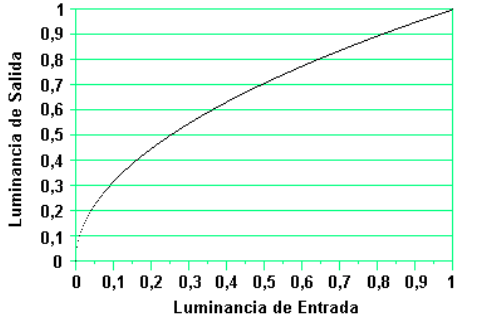

Por último, se observa que la función cuadrática empeora la imagen, esto es debido a que al realizar la potencia cuadrada de un número menor a uno, el mismo se vuelve menor, lo que hace oscurecer la imagen





### Segunda imagen

Text(0.5, 1.0, 'Histograma imagen potencia cuadrática')

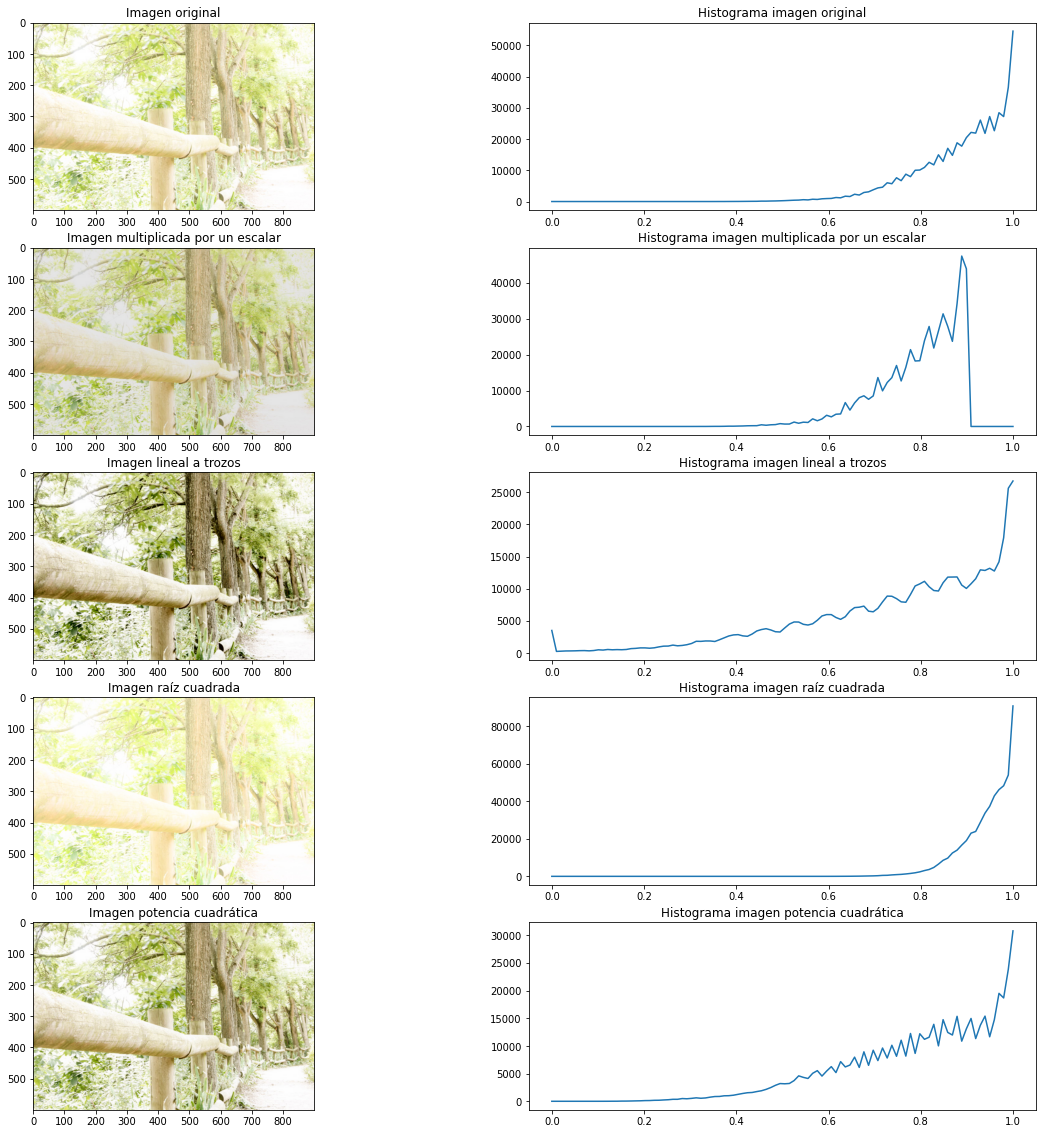

In [22]:
fig11, ax11 = plt.subplots(5,2)
fig11.set_size_inches(20, 20)

ax11[0,0].imshow(imgB)
ax11[0,0].set_title("Imagen original")
ax11[0,1].plot(binsYB, histYB)
ax11[0,1].set_title("Histograma imagen original")

ax11[1,0].imshow(imgBmod)
ax11[1,0].set_title("Imagen multiplicada por un escalar")
ax11[1,1].plot(binsYBmod, histYBmod)
ax11[1,1].set_title("Histograma imagen multiplicada por un escalar")

ax11[2,0].imshow(imgBmodlin)
ax11[2,0].set_title("Imagen lineal a trozos")
ax11[2,1].plot(binsYBlin, histYBlin)
ax11[2,1].set_title("Histograma imagen lineal a trozos")

ax11[3,0].imshow(imgBmodsqrt)
ax11[3,0].set_title("Imagen raíz cuadrada")
ax11[3,1].plot(binsYBsqrt, histYBsqrt)
ax11[3,1].set_title("Histograma imagen raíz cuadrada")

ax11[4,0].imshow(imgBmodcuad)
ax11[4,0].set_title("Imagen potencia cuadrática")
ax11[4,1].plot(binsYBcuad, histYBcuad)
ax11[4,1].set_title("Histograma imagen potencia cuadrática")

Para esta imagen, se puede observar que la misma estaba sobreexpuesta ya que la misma se encuentra muy iluminada. Para este caso, no se observa un buen resultado para la luminancia multiplicada por un escalar, ya que como se mencionó anteriormente, esta función no suele ser adecuada para todos los casos. En cuanto a la función lineal a trozos, al proveer una pendiente alta para valores de luminancia, se observa una saturación de los colores lo cual perjudica la representación de colores y si bien el resultado es aceptable, existen mejores filtros. 

Por otr lado, como se explicó anteriormente, la función raíz cuadrada aumenta la luminancia de la imagen, por lo que para este caso particular la misma no es de utilidad.

Por último, el mejor resultado se obtiene utilizando la función potencia cuadrática, ya que se logra que los valores de luminancia se dispersen hacia valores menores, lo cual oscurece la imagen. Esto mismo se puede observar de la siguiente función, donde se ve que que las altas luminancias se encuentran multiplicadas por un valor menor, lo que reduce la alta luminancia de la imagen.

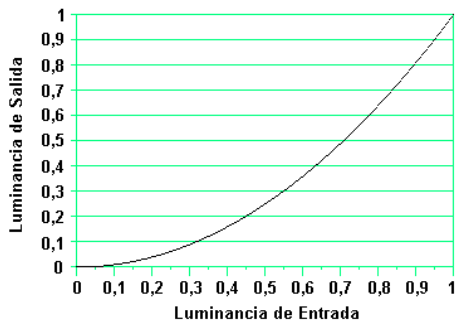
